# Project - AirBnB Seattle Price Determinant Model

# Description:

This project will explore the features that determine the price of an Air BnB rental in Seattle. It data prepocessing, analysis, visualizations, a predictive model, etc.  The code is given below and is divided into six sections:
 1. Gather
 2. Assess
 3. Clean
 4. Analyze & Visualize
 5. Model and Conclusion


# Bussiness Questions:

The ultimate goal of this project is to answer three main questions:

1. What features contribute the most to the price of an Air BnB in Seattle?

2. What important data is missing from the data set to form a predictive model?

3. How accurately can the price be predicted 

These questions will addressed throughout the notebook and again at the end of it when the results are provided.

In [518]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [289]:
pwd

'/Users/bryanchambers/Desktop/Bootcamp/archive'

In [290]:
cd /Users/bryanchambers/Desktop/Bootcamp/archive


/Users/bryanchambers/Desktop/Bootcamp/archive


In [291]:
pwd


'/Users/bryanchambers/Desktop/Bootcamp/archive'

# 1. Gathering the Data: 

The relevant data is imported into the jupyter notebook. The project only really uses the 'listings_data', the 'calendar_data' was not used. 

In [292]:
calendar_data = pd.read_csv('/Users/bryanchambers/Desktop/Bootcamp/archive/calendar.csv')
listings_data = pd.read_csv('/Users/bryanchambers/Desktop/Bootcamp/archive/listings.csv')

# 2. Assessing the Data: 

Now the data will be looked at briefly in order to get a feel of the data, see how much is missing, whether its useful, and also get some statistical insight into the data.

In [293]:
#calendar_data[400:450]

In [294]:
calendar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [295]:
#calendar_data.describe()

In [296]:
listings_data.iloc[1:5, 75:90]

,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
1,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t
2,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f
4,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,WASHINGTON,f,strict,f,f


In [297]:
#listings_data.info()

In [298]:
listings_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [299]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# 3. Cleaning the Data: 

Now that there is a somewhat clear picture of the data to be worked with it must be cleaned up. Missing values will be imputed, inconvenient symbols such as the '$' will be removed from the columns, etc. 

In [385]:
df = listings_data.drop(['listing_url', 'last_scraped','name','name','summary','space','description','neighborhood_overview', 
                         'notes', 'transit', 'thumbnail_url','medium_url','picture_url','xl_picture_url', 'host_url','host_name',
                         'host_location','host_about','thumbnail_url', 'medium_url','picture_url','xl_picture_url','host_verifications'
                        ,'street','state','zipcode','market','smart_location', 'country_code', 'country','weekly_price', 
                         'monthly_price','calendar_updated','has_availability','availability_30','availability_60','calendar_last_scraped',
                        'requires_license','jurisdiction_names','instant_bookable','require_guest_profile_picture',
                         'require_guest_phone_verification','scrape_id','experiences_offered',
                        'host_thumbnail_url','host_picture_url','host_has_profile_pic','is_location_exact','security_deposit',
                        'maximum_nights','availability_90','first_review','last_review','review_scores_accuracy',
                         'review_scores_cleanliness','review_scores_checkin','review_scores_communication','square_feet',
                         'review_scores_location','license','host_acceptance_rate','host_response_rate','host_total_listings_count',
                        'host_identity_verified','host_neighbourhood','city','neighbourhood_group_cleansed',
                        'neighbourhood','review_scores_value','amenities'], axis = 1)

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3818 non-null   int64  
 1   host_id                         3818 non-null   int64  
 2   host_since                      3816 non-null   object 
 3   host_response_time              3295 non-null   object 
 4   host_is_superhost               3816 non-null   object 
 5   host_listings_count             3816 non-null   float64
 6   neighbourhood_cleansed          3818 non-null   object 
 7   latitude                        3818 non-null   float64
 8   longitude                       3818 non-null   float64
 9   property_type                   3817 non-null   object 
 10  room_type                       3818 non-null   object 
 11  accommodates                    3818 non-null   int64  
 12  bathrooms                       38

In [387]:
def missing_data(data):
    '''
    INPUT:
    data - a dataframe for which it is necessary to know the amount of missing data
    for each column
    
    OUTPUT:
    col_name - a list of columns in the dataframe
    sum(data[col_name].isnull()) - the amount of missing entries for the col_name. 
    '''
    for col_name in data.columns:
        if sum(data[col_name].isnull()) > 0:
            print("count:", col_name,"missing:", sum(data[col_name].isnull()))
            

In [388]:
missing_data(df)

count: host_since missing: 2
count: host_response_time missing: 523
count: host_is_superhost missing: 2
count: host_listings_count missing: 2
count: property_type missing: 1
count: bathrooms missing: 16
count: bedrooms missing: 6
count: beds missing: 1
count: cleaning_fee missing: 1030
count: review_scores_rating missing: 647
count: reviews_per_month missing: 627


# Bussiness Question 2 result:

In [389]:
df.cleaning_fee =df.cleaning_fee.str.replace('$','')
df.price = df.price.str.replace('$','')
df.extra_people = df.extra_people.str.replace('$','')

In [390]:
df.price = df.price.str.replace(',','')

In [391]:
#df["price"] = df.price.astype(float)
df["cleaning_fee"] = df.cleaning_fee.astype(float)
df["extra_people"] = df.extra_people.astype(float)

In [392]:
df["price"] = df.price.astype(float)

In [393]:
#df.iloc[1:10,16:30]

Looking at the missing data the most commonly missing info is regarding the 'cleaning_fee',
there are 1030 missing rows for it. A good way to deal with this is the create a 'group' where the listings are grouped based on commonalities they share, such as in this case into the property type and number of bedrooms. The number of groups should be a feasible one to work one, requiring more features will complicate the number of groups that must be accounted for.
After that the mean value for each group is imputed, thereby salvaging valuable data. 

In [394]:
mean_fee = df.groupby(['property_type','bedrooms'])['cleaning_fee'].mean()

In [395]:
mean_fee

property_type    bedrooms
Apartment        0.0          44.697561
                 1.0          50.273537
                 2.0          88.401606
                 3.0         149.937500
                 4.0         104.000000
Bed & Breakfast  1.0          30.882353
Boat             1.0          17.500000
                 2.0         100.000000
                 3.0         275.000000
                 4.0         100.000000
Bungalow         0.0          42.142857
                 1.0          18.500000
                 4.0         200.000000
Cabin            0.0          37.500000
                 1.0          28.500000
                 2.0                NaN
Camper/RV        0.0          20.000000
                 1.0          27.142857
Chalet           1.0          30.000000
Condominium      0.0          50.000000
                 1.0          55.760870
                 2.0          95.500000
                 3.0          60.000000
Dorm             1.0           6.000000
House         

In [396]:
# fill in missing cleaning fees based on the type of property and number of bedrooms for that property
df['cleaning_fee'] =df.groupby(['property_type','bedrooms'])['cleaning_fee'].apply(lambda x: x.fillna(x.mean()))

In [397]:
#df.iloc[1:13, 1:15]

A check for whether all the missing 'cleaning_fee' values are now fixed shows:

In [398]:
sum(df['cleaning_fee'].isnull())

17

Take a look at the entries that are still missing despite the previous effort to impute them:

In [399]:
clean_fee_missing = df[df['cleaning_fee'].isnull()]

In [400]:
#clean_fee_missing.iloc[:,9:20]

Looking at the 'property type' for this data frame, although there some entries that are just regular apartments, there are also a handful of non-traditional rentals such as 'treehouse', 'tent', 'cabin'. A closer can give the exact
number of each. 

In [401]:
prop_types = clean_fee_missing['property_type'].value_counts(dropna=False)
prop_types

Tent         5
Apartment    4
Treehouse    3
Other        2
House        1
Cabin        1
NaN          1
Name: property_type, dtype: int64

Its not possible to know for sure what these missing values are, so again the can be guessed. Looking at the 'mean_fee' array, the 'cleaning_fee' for a yurt was found to be $25. That seems like a reasonable amount to replace the missing value for a tent and a treehouse because they are a similar kind of accomodation. 

In [402]:
df.loc[df['property_type'] == 'Tent', 'cleaning_fee'] = 25

In [403]:
df.loc[df['property_type'] == 'Treehouse', 'cleaning_fee'] = 25

There is also no average cleaning fee for a 2 bedroom cabin, so that value will be replaced by the average value for a 0 or 1 bedroom cabin, about $33. Since it is only one entry this will be done using brute force, it seems the easiest way to do so. And this method will be used when only a handful of entries need to be imputed because they are null. 

In [404]:
cabin_listings = df.loc[df['property_type']=='Cabin']

In [405]:
mean_cabin_fee = cabin_listings.groupby(['accommodates'])['cleaning_fee'].mean()
mean_cabin_fee

accommodates
1    28.500000
2    29.538462
3    37.833333
4    26.666667
8          NaN
Name: cleaning_fee, dtype: float64

In [406]:
#cabin_listings.iloc[:,9:20]

In [407]:
cabin_listings[np.isnan(cabin_listings['cleaning_fee'])]

,id,host_id,host_since,host_response_time,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,...,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,calculated_host_listings_count,reviews_per_month
1115,3379116,14138534,2014-04-10,within a few hours,t,1.0,Eastlake,47.64715,-122.322739,Cabin,...,NaN,1,0.0,2,297,43,98.0,moderate,1,2.7


In [408]:
index_no = df.columns.get_loc('cleaning_fee') 

In [409]:
index_no

17

So, after some tedious work it is found that the location of the missing cleaning fee value for the the cabin property
type is row 1115, column 17. Double check that to confirm it:

In [411]:
df.iloc[1115,17]

nan

So now that the index location has been properly identified replace it with a value of 33

In [412]:
df.iloc[1115,17]=33

In [413]:
df.iloc[1115,17]

33.0

Next thing to tackle is the missing cleaning fees for the apartment property type. There are 4 of these. 

In [414]:
apartment_listings = df.loc[df['property_type']=='Apartment']

In [415]:
missing_apt_cleaning = apartment_listings[np.isnan(apartment_listings['cleaning_fee'])]

Take a look at the rows of apartments with missing cleaning fees:

In [416]:
missing_apt_cleaning.iloc[:,9:20]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people
1429,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,80.0,NaN,2,25.0
1492,Apartment,Entire home/apt,6,1.0,NaN,1.0,Real Bed,200.0,NaN,1,0.0
1853,Apartment,Entire home/apt,2,1.0,NaN,1.0,Real Bed,95.0,NaN,2,0.0
2915,Apartment,Entire home/apt,2,1.0,NaN,1.0,Pull-out Sofa,75.0,NaN,1,0.0


In [417]:
mean_apt_fee = apartment_listings.groupby(['accommodates'])['cleaning_fee'].mean()
mean_apt_fee

accommodates
1      42.402724
2      44.466266
3      50.518418
4      66.209083
5      74.570810
6      96.436734
7     110.783467
8     148.000000
9     187.000000
10    159.000000
Name: cleaning_fee, dtype: float64

The missing apt. cleaning fees will be imputed based on the average price for the number of people the property accomodates given in the 'accommodates' column because there is nothing listing under the 'bedroom' column for these listings. The locations are rows 1429, 1492, 1853, 2915, and column 17. 

In [418]:
df.iloc[1429,17]=45
df.iloc[1492,17]=96
df.iloc[1853,17]=45
df.iloc[2915,17]=45

In [419]:
#df.info()

There are still 4 missing values for the cleaning fee, 1 for the 'house', 2 for 'other', and 1 for 'NaN' property type. So they will be dealt with the same as the others:

In [420]:
house_listings = df.loc[df['property_type']=='House']

In [421]:
missing_house_cleaning = house_listings[np.isnan(house_listings['cleaning_fee'])]

In [422]:
missing_house_cleaning.iloc[:,9:20]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people
2619,House,Entire home/apt,2,1.0,NaN,1.0,Real Bed,99.0,NaN,1,0.0


In [423]:
mean_house_fee = house_listings.groupby(['accommodates'])['cleaning_fee'].mean()
mean_house_fee

accommodates
1      30.920961
2      30.972398
3      40.314172
4      65.232653
5      89.271334
6     102.231993
7     111.395074
8     130.172766
9     170.090608
10    168.282353
11    237.500000
12    209.726984
14    115.000000
15    175.000000
16    250.000000
Name: cleaning_fee, dtype: float64

As can be seen above, it would be reasonable guess for the cleaning fee for this house to be $31 because that is the average cleaning price for a house that accommodates 2 people, so next step is to impute this replacing the missing value. 

In [424]:
df.iloc[2619,17] = 31

In [425]:
df.iloc[2619,17]

31.0

Next, the missing cleaning fees for the 'other' property type will be handled:

In [426]:
other_listings = df.loc[df['property_type']=='Other']

In [427]:
missing_other_cleaning = other_listings[np.isnan(other_listings['cleaning_fee'])]

In [428]:
missing_other_cleaning.iloc[:,9:20]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people
1493,Other,Entire home/apt,4,1.0,NaN,2.0,Real Bed,132.0,NaN,1,0.0
3400,Other,Entire home/apt,4,1.0,2.0,2.0,Real Bed,150.0,NaN,1,0.0


It is unsure why this property type is listed as 'other', but it seems to have most things a decent apartment has such as a bathroom, bed, and bedrooms. Both listings accommodate 4 people so a good guess for the cleaning fees is to replace them with the average cleaning fee of an apartment that accommodates 4 people, $65.  

In [429]:
df.iloc[1493,17]=65
df.iloc[3400,17]=65

Lastly, the NaN listing for the property type that is missing a cleaning fee:

In [430]:
NaN_listings = df.loc[df['property_type'].isnull()]

In [431]:
NaN_listings.iloc[:,9:20]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people
2184,NaN,Entire home/apt,4,1.0,2.0,2.0,Real Bed,120.0,NaN,2,10.0


So, finally replace this missing value with the average apartment value that accomodates 4, $65. 

In [432]:
df.iloc[2184,17] = 65

In [433]:
df.iloc[2184,17]

65.0

Also, it would be better to give it an actual property type instead of NaN.

In [434]:
index_no = df.columns.get_loc('property_type') 
index_no

9

In [435]:
df.iloc[2184,9] = 'House'

So, that should take care of all missing values for the cleaning fee. Verify that below:

In [436]:
sum(df['cleaning_fee'].isnull())

0

Indeed it is verified, all cleaning fee values are non-null.

In [437]:
#df.head()

Next, there are 523 missing entries for 'host_response_time'. They should be looked at:

See what columns still have missing data:

In [438]:
missing_data(df)

count: host_since missing: 2
count: host_response_time missing: 523
count: host_is_superhost missing: 2
count: host_listings_count missing: 2
count: bathrooms missing: 16
count: bedrooms missing: 6
count: beds missing: 1
count: review_scores_rating missing: 647
count: reviews_per_month missing: 627


In [439]:
sum(df['host_response_time'].isnull())

523

What are the unique answers that can be input for this column:

In [440]:
df['host_response_time'].unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

What is the counts for each of these responses:

In [441]:
counts = df['host_response_time'].value_counts(dropna=False)

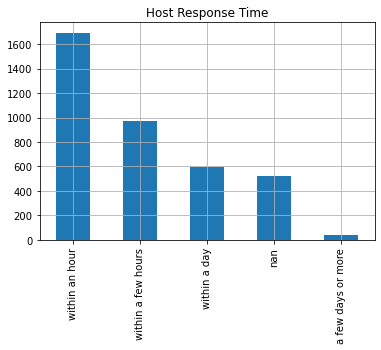

In [442]:
counts.plot.bar(title='Host Response Time', grid=True)

Looking at the data above regarding the amount of missing data, it deserves a look to see if they are a common group, that is are the rows that are missing 'host_reponse_time', also missing 'review_scores_rating' and 'reviews_per_month'? 

In [443]:
missing = zip(df['host_response_time'].isnull(), df['review_scores_rating'].isnull())

In [444]:
missing = pd.DataFrame(missing)

In [445]:
len(missing[missing.sum(axis=1)==2])

211

So, from the previous couple lines of code it is apparent that for 211 rows the data is missing for both 'host_response_time' and 'review_scores_rating'. If possible it is prudent to preserve these rows by imputing these missing values in way that seems plausible. Starting with the bar graph for the 'host_response_times' it is clear that most hosts respond within a few hours and the most common response time is within one hour. This might not be a major contributing factor the the price of renting a room. A sensible solution for handling the missing data is to just replace it with responds 'within a few hours'. 

In [446]:
df['host_response_time'].fillna('within a few hours', inplace = True)

Before moving on, check the bar graph to see the distribution for this column. Re-calculate the 'counts' first!

In [447]:
counts = df['host_response_time'].value_counts(dropna=False)

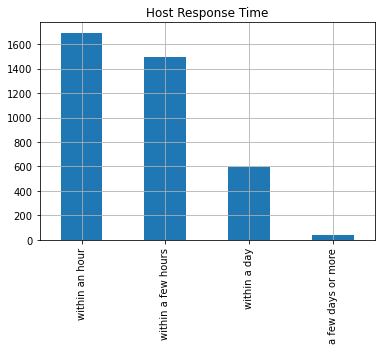

In [448]:
counts.plot.bar(title='Host Response Time', grid=True)


Indeed, the bar graph checks out, the missing values have been allocated to 'within a few hours'. 

Checking in with the missing data function again gives:

In [449]:
missing_data(df)

count: host_since missing: 2
count: host_is_superhost missing: 2
count: host_listings_count missing: 2
count: bathrooms missing: 16
count: bedrooms missing: 6
count: beds missing: 1
count: review_scores_rating missing: 647
count: reviews_per_month missing: 627


The next missing data that will be dealt with is that of 'bathrooms' and 'bedrooms'. It can be inferred that the number of bathrooms is correlated to the number of bedrooms and the number of people the house accommodates

In [450]:
mean_bathrooms = df.groupby(['accommodates','bedrooms'])['bathrooms'].mean()
mean_bathrooms

accommodates  bedrooms
1             0.0         1.000000
              1.0         1.195918
2             0.0         0.995968
              1.0         1.101981
              2.0         1.312500
3             0.0         0.981132
              1.0         1.041935
              2.0         1.250000
4             0.0         0.981481
              1.0         1.056872
              2.0         1.307554
              3.0         1.900000
              4.0         2.500000
5             0.0         1.000000
              1.0         1.060976
              2.0         1.558252
              3.0         1.888889
              4.0         1.500000
6             0.0         1.000000
              1.0         1.131579
              2.0         1.519337
              3.0         2.000000
              4.0         2.583333
              5.0         3.000000
7             0.0         1.500000
              1.0         1.000000
              2.0         1.343750
              3.0         2.2166

In [451]:
df['bathrooms'] =df.groupby(['accommodates','bedrooms'])['bathrooms'].apply(lambda x: x.fillna(int(x.mean())))

In [452]:
sum(df['bathrooms'].isnull())

6

So, despite filling in the missing number of bathrooms with the mean value of those with the same number of people it accommodates and number of bedrooms there are still 6 missing values. They should be inspected: 

In [453]:
bathrooms_missing = df.loc[df['bathrooms'].isnull()]

In [454]:
bathrooms_missing.iloc[:, 9:18]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee
1429,Apartment,Entire home/apt,2,NaN,NaN,1.0,Real Bed,80.0,45.0
1492,Apartment,Entire home/apt,6,NaN,NaN,1.0,Real Bed,200.0,96.0
1493,Other,Entire home/apt,4,NaN,NaN,2.0,Real Bed,132.0,65.0
1853,Apartment,Entire home/apt,2,NaN,NaN,1.0,Real Bed,95.0,45.0
2619,House,Entire home/apt,2,NaN,NaN,1.0,Real Bed,99.0,31.0
2915,Apartment,Entire home/apt,2,NaN,NaN,1.0,Pull-out Sofa,75.0,45.0


The remaining rows which did not have a value for bathrooms imputed are the same ones that are missing the value for the number of bedrooms. Well, from the mean_bathrooms array it is clear that dwellings that accommodate 1-2 individuals generally only have one bathroom. In fact, only dwellings that have 3 bedrooms or more are likely to have more than one bathroom. It can only be guessed but for now the dwellings that accommodate 2-4 people will have their missing bathroom value imputed with 1, and the dwelling that accommodates six will be imputed with 2 bathrooms. The barplot below confirms this educated guess. 

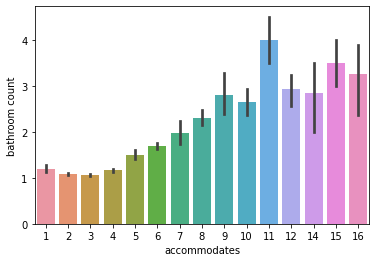

In [455]:
b = sns.barplot(x='accommodates', y='bathrooms', data=df).set_ylabel('bathroom count')


Likewise, a bar graph of the number of bedrooms given an accommodation number can also be created below:

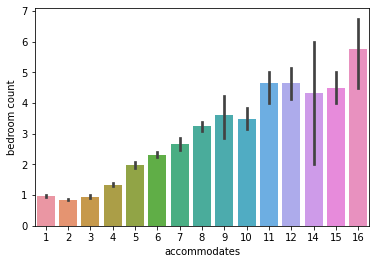

In [456]:
b = sns.barplot(x='accommodates', y='bedrooms', data=df).set_ylabel('bedroom count')


And again, it is clear from the bar graph that a habitacion that accommodates less than 5 people probably had one bedroom, and one that accomodates 5 or 6 probably had two bedrooms. So, that information will be imputed into the six rows missing values for number of bathrooms and bedrooms. These columns have the 12th and 13th column index respectively. 

In [457]:
#df.info()

In [458]:
df.iloc[1429,12] = 1
df.iloc[1429,13] = 1
df.iloc[1492,12] = 2
df.iloc[1492,13] = 2
df.iloc[1493,12] = 1
df.iloc[1493,13] = 1
df.iloc[1853,12] = 1
df.iloc[1853,13] = 1
df.iloc[2619,12] = 1
df.iloc[2619,13] = 1
df.iloc[2915,12] = 1
df.iloc[2915,13] = 1

And double check this was done correctly before moving on:

In [459]:
sum(df['bathrooms'].isnull())

0

In [460]:
sum(df['bedrooms'].isnull())

0

There is one missing value for 'beds'. It will be located and imputed now

In [461]:
bed_missing = df.loc[df['beds'].isnull()]
bed_missing.iloc[:,9:20]

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,cleaning_fee,guests_included,extra_people
1961,House,Private room,4,1.0,1.0,NaN,Real Bed,280.0,33.120846,1,0.0


Upon further inspection the house has one bedroom but accommodates 4 people, a common sense imputation for the missing bed value is 2. 

In [462]:
df.iloc[1961,14]=2

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3818 non-null   int64  
 1   host_id                         3818 non-null   int64  
 2   host_since                      3816 non-null   object 
 3   host_response_time              3818 non-null   object 
 4   host_is_superhost               3816 non-null   object 
 5   host_listings_count             3816 non-null   float64
 6   neighbourhood_cleansed          3818 non-null   object 
 7   latitude                        3818 non-null   float64
 8   longitude                       3818 non-null   float64
 9   property_type                   3818 non-null   object 
 10  room_type                       3818 non-null   object 
 11  accommodates                    3818 non-null   int64  
 12  bathrooms                       38

There is still some missing values for host_since, host_is_superhost, and host_listings_count, but that is only a couple of rows and will be handled last. The major missing data is for review_scores_rating and reviews_per_month, 647 and 627 null values respectively.   

In [464]:
missing_data(df)

count: host_since missing: 2
count: host_is_superhost missing: 2
count: host_listings_count missing: 2
count: review_scores_rating missing: 647
count: reviews_per_month missing: 627


But from experience, it may be good to see whether this data is even useful. Perhaps it can just be deleted from the data frame. The best way to check this is to use a heatmap

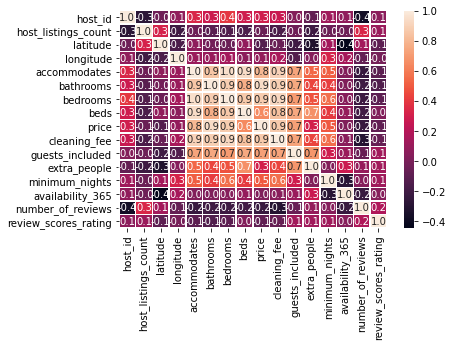

In [474]:
sns.heatmap(df.iloc[1:24:, 1:24:].corr(), annot = True, fmt = '.1f', linewidths=.5);

Its a little hard to see the correlation numbers but according to the heatmap price and review_scores have a negative correlation, so do price and number_of_reviews, that means they can be dropped from the data frame. 


Next step is to look at the categorical variables. Some work is needed to be done with them. They should be in a format than can be converted to numerical data. The 'host_since' column has some unuseful characters in it, adjust this so it only pulls out the four digit year, and then convert that to an integer. 

In [475]:
df.head()

,id,host_id,host_since,host_response_time,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,...,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,241032,956883,2011-08-11,within a few hours,f,3.0,West Queen Anne,47.636289,-122.371025,Apartment,...,50.273537,2,5.0,1,346,207,95.0,moderate,2,4.07
1,953595,5177328,2013-02-21,within an hour,t,6.0,West Queen Anne,47.639123,-122.365666,Apartment,...,40.000000,1,0.0,2,291,43,96.0,strict,6,1.48
2,3308979,16708587,2014-06-12,within a few hours,f,2.0,West Queen Anne,47.629724,-122.369483,House,...,300.000000,10,25.0,4,220,20,97.0,strict,2,1.15
3,7421966,9851441,2013-11-06,within a few hours,f,1.0,West Queen Anne,47.638473,-122.369279,Apartment,...,44.697561,1,0.0,1,143,0,NaN,flexible,1,NaN
4,278830,1452570,2011-11-29,within an hour,f,2.0,West Queen Anne,47.632918,-122.372471,House,...,125.000000,6,15.0,1,365,38,92.0,strict,1,0.89


In [476]:
df['host_since'] = df['host_since'].str[:4]

In [477]:
host_since_missing = df.loc[df['host_since'].isnull()]
host_since_missing

,id,host_id,host_since,host_response_time,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,...,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,cancellation_policy,calculated_host_listings_count,reviews_per_month
1297,8354452,42515980,NaN,within a few hours,NaN,NaN,Belltown,47.616705,-122.353969,Apartment,...,25.000000,1,25.0,2,89,0,NaN,moderate,1,NaN
1419,10235014,1075031,NaN,within a few hours,NaN,NaN,Belltown,47.615974,-122.340537,Apartment,...,50.273537,1,0.0,1,3,0,NaN,flexible,1,NaN


In [478]:
df['host_since'].unique()

array(['2011', '2013', '2014', '2010', '2012', '2015', '2016', '2009',
       nan, '2008'], dtype=object)

In [479]:
df['host_is_superhost'].unique()

array(['f', 't', nan], dtype=object)

2016 will be imputed for 'host_since', there is no way to know this but since these listings seem rather inactive it may be because this is a new listing so 2016 seems justified for this missing data. An 'f' will be marked for 
'host_is_superhost' because the listing is inactive and has 0 reviews so they are clearly not one. 1 will replace the 
null value for 'host_listings_count', this seems the obvious choice. 

In [480]:
df.iloc[1297,2] = 2016
df.iloc[1297, 4] = 'f'
df.iloc[1297,5] = 1

df.iloc[1419,2] = 2016
df.iloc[1419, 4] = 'f'
df.iloc[1419,5] = 1

In [481]:
df["host_since"] = df.host_since.astype(int)

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3818 non-null   int64  
 1   host_id                         3818 non-null   int64  
 2   host_since                      3818 non-null   int64  
 3   host_response_time              3818 non-null   object 
 4   host_is_superhost               3818 non-null   object 
 5   host_listings_count             3818 non-null   float64
 6   neighbourhood_cleansed          3818 non-null   object 
 7   latitude                        3818 non-null   float64
 8   longitude                       3818 non-null   float64
 9   property_type                   3818 non-null   object 
 10  room_type                       3818 non-null   object 
 11  accommodates                    3818 non-null   int64  
 12  bathrooms                       38

So now it is clear that all missing values have been filled in, and all rows of data were preserved, that will help the linear model be more accurate hopefully. The next step is to convert all objects such as strings to categorical variables. A quick revision will be given to the unique values in each column to make sure they are something that can be converted to dummy variables. 

In [483]:
df['host_response_time'].unique()

array(['within a few hours', 'within an hour', 'within a day',
       'a few days or more'], dtype=object)

In [484]:
df['host_is_superhost'].unique()

array(['f', 't'], dtype=object)

In [485]:
df['neighbourhood_cleansed'].unique()

array(['West Queen Anne', 'Adams', 'West Woodland', 'East Queen Anne',
       'Wallingford', 'North Queen Anne', 'Green Lake', 'Westlake',
       'Mann', 'Madrona', 'University District', 'Harrison/Denny-Blaine',
       'Minor', 'Leschi', 'Atlantic', 'Pike-Market', 'Eastlake',
       'South Lake Union', 'Lawton Park', 'Briarcliff', 'Belltown',
       'International District', 'Central Business District',
       'First Hill', 'Yesler Terrace', 'Pioneer Square', 'Gatewood',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill',
       'Fairmount Park', 'Genesee', 'Interbay', 'Industrial District',
       'Mid-Beacon Hill', 'South Beacon Hill', 'Greenwood', 'Holly Park',
       'Fauntleroy', 'North Beacon Hill', 'Mount Baker', 'Brighton',
       'South Delridge', 'View Ridge', 'Dunlap', 'Rainier Beach',
       'Columbia City', 'Seward Park', 'North Delridge', 'Maple Leaf',
       'Ravenna', 'Riverview', 'Portage Bay', 'Bryant', 'Montlake',
       'Broadway', 'Loyal Heights', 'Vict

In [486]:
neighbourhoods = df['neighbourhood_cleansed'].value_counts()

In [487]:
neighbourhoods.iloc[40:60]

South Lake Union          27
Whittier Heights          26
Pioneer Square            23
Gatewood                  22
Crown Hill                21
Dunlap                    20
Matthews Beach            19
Montlake                  19
North College Park        19
Madison Park              18
Rainier Beach             18
Wedgwood                  18
Sunset Hill               18
International District    17
Southeast Magnolia        17
Westlake                  17
Yesler Terrace            17
Broadview                 17
Olympic Hills             16
Haller Lake               15
Name: neighbourhood_cleansed, dtype: int64

In [488]:
len(df['neighbourhood_cleansed'].value_counts())

87

In [489]:
df['property_type'].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'],
      dtype=object)

In [490]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [491]:
df['bed_type'].unique()

array(['Real Bed', 'Futon', 'Pull-out Sofa', 'Airbed', 'Couch'],
      dtype=object)

In [492]:
df['cancellation_policy'].unique()

array(['moderate', 'strict', 'flexible'], dtype=object)

These columns all appear to workable ones for converting to dummy variables. The only thing that raises an eyebrow is that there are 87 different neighbourhoods in Seattle. Thats a huge number, if time is allowed it may be a good idea to combine them somehow so there are less variables. Perhaps the latitude and longitude values can be used to implement some kind a grouping algorithm like KNN, reducing the number of neighborhoods. 

In [493]:
df.columns

Index(['id', 'host_id', 'host_since', 'host_response_time',
       'host_is_superhost', 'host_listings_count', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

# 4. Data Analysis and Visualizations

The data will be looked at using heatmaps to determine correlations between features and the price. The categorical columns will be converted to numerical ones so they can be included in the predictive model.

Before moving on its wise to take a quick look at a heatmap. It shows how the numerical data is correlated. According to the heatmap below the numerical variables that have the strongest correlation to the price of a dwelling are 'guests_included', 'cleaning_fee', 'beds', 'bedrooms', 'bathrooms', 'accommodates', 'host_listings_count', 'availability_365', and 'minimum_nights'. The variables 'latitude', 'longitude', 'host_listings_count', and 'number_of_reviews', all had zero bearing on the response variable 'price'. So all of those will be removed now. 

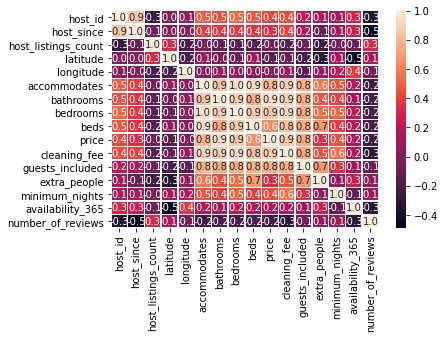

In [496]:
sns.heatmap(df.iloc[1:22:, 1:23:].corr(), annot = True, fmt = '.1f', linewidths=.5);

In [529]:
features = ['host_since','host_response_time','host_is_superhost','neighbourhood_cleansed',
           'property_type','accommodates','bathrooms','bedrooms','beds','bed_type','cleaning_fee',
          'guests_included','extra_people','minimum_nights','availability_365',
           'cancellation_policy','calculated_host_listings_count','price']

In [530]:
df_reduced = df[features]

In [531]:
y = df['price']

Now that the data frame has been reduced, make another heat map to check for non-correlations that can further be removed from the design matrix. 

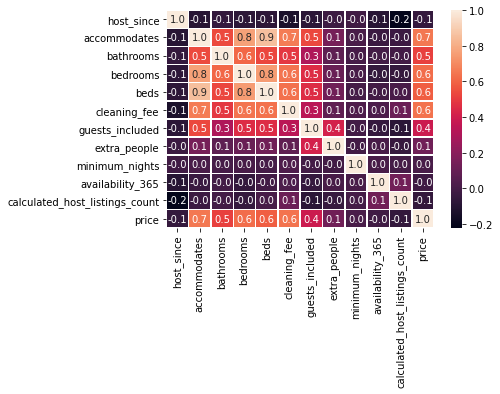

In [532]:
sns.heatmap(df_reduced.corr(), annot = True, fmt = '.1f', linewidths=.5);

# Bussiness Question 1 Result:

The first bussiness question was 'what features are most correlated to the price feature of a listing?' This has been narrowed down and the important features will be all that remains in the design matrix X. It is now clear from the reduced heat map that additionaly 'host_since', reviews_per_month', and 'calculated_host_listings_count', 'reviews_scores_rating', and 'availability_365' can all be removed too. It is a bit strange though because on the previous heatmap it appeared that there was a correlation between price and those features. There are still categorical variables in the data set though so it should be determined whether they are insigtful after converting them to numerical data. 

In [553]:
features2 = ['host_response_time','host_is_superhost','neighbourhood_cleansed','property_type',
               'accommodates','bathrooms','bedrooms','beds','bed_type','cleaning_fee',
          'guests_included','minimum_nights','extra_people','cancellation_policy']

Now that the data set has been cleaned it is time to convert the categorical columns to numerical ones. First the categocal columns will be extracted from the data frame and then the function 'create_dummy_df' will do the trick. The function 'create_dummy_df' will also convert NaN values to a Boolean, but all of the NaN values have been filled in already so that is not an issue. 

In [554]:
X = df[features2]

In [555]:
X.head()

,host_response_time,host_is_superhost,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,cleaning_fee,guests_included,minimum_nights,extra_people,cancellation_policy
0,within a few hours,f,West Queen Anne,Apartment,4,1.0,1.0,1.0,Real Bed,50.273537,2,1,5.0,moderate
1,within an hour,t,West Queen Anne,Apartment,4,1.0,1.0,1.0,Real Bed,40.000000,1,2,0.0,strict
2,within a few hours,f,West Queen Anne,House,11,4.5,5.0,7.0,Real Bed,300.000000,10,4,25.0,strict
3,within a few hours,f,West Queen Anne,Apartment,3,1.0,0.0,2.0,Real Bed,44.697561,1,1,0.0,flexible
4,within an hour,f,West Queen Anne,House,6,2.0,3.0,3.0,Real Bed,125.000000,6,1,15.0,strict


In [556]:
y = df['price']

In [557]:
cat_df = X.select_dtypes(include=['object']).copy()

The categorical variables will now be converted to dummy variables.

In [548]:
#Create a copy of the dataframe
cat_df_copy = cat_df.copy()
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [558]:
X = create_dummy_df(X, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(X.shape)

(3818, 119)


# 5. Modeling the Data

The training data will now be modeled and this linear model will be used to make predictions on the price of a rental using the test data. Then the accuracy of the predictions will assessed to determine how effective the model is by looking at the 'r2 score'. 

In [550]:
def clean_fit_linear_mod(df, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    #df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    #X = df.drop(response_col, axis=1)
    #y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

In [559]:
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df= X, cat_cols = cat_cols_lst, dummy_na=False)

In [560]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.6077296893606137.  The rsquared on the test data was 0.5826326575808638.


# Bussiness Question 3 Result:

The third bussiness question was 'how accurately can the price of a listing be predicted?' This question can perhaps be best answered by looking at the r2 score on the test data which was found to have a value of 0.58. An r2 value above 0.50 is considered decent, excellent would be above 0.75, so the model doesn't fit excellently, but overall the model is successful and decently accurate. 